<a href="https://colab.research.google.com/github/saim-glitch/Freelancing/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Exploratory analysis**


In [4]:
# Basic Overview
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load
df = pd.read_csv('/content/fake_news_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset Shape: (3044, 7)

Columns: ['title', 'text', 'date', 'source', 'author', 'category', 'label']

Data Types:
title       object
text        object
date        object
source      object
author      object
category    object
label       object
dtype: object

First few rows:


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [5]:
# Basic statistics and missing values analysis
print("Missing Values Analysis:")
print(df.isnull().sum())
print("\nMissing Values Percentage:")
print(df.isnull().sum() / len(df) * 100)

# Basic statistics for text length
df['title_length'] = df['title'].str.len()
df['text_length'] = df['text'].str.len()

print("\nText Length Statistics:")
print(df[['title_length', 'text_length']].describe())

Missing Values Analysis:
title         0
text          0
date          1
source      147
author      174
category      1
label         1
dtype: int64

Missing Values Percentage:
title       0.000000
text        0.000000
date        0.032852
source      4.829172
author      5.716163
category    0.032852
label       0.032852
dtype: float64

Text Length Statistics:
       title_length  text_length
count   3044.000000  3044.000000
mean      35.768397  1636.255913
std       10.454787   191.131217
min       12.000000  1261.000000
25%       28.000000  1477.000000
50%       35.000000  1633.000000
75%       44.000000  1800.000000
max       69.000000  2077.000000


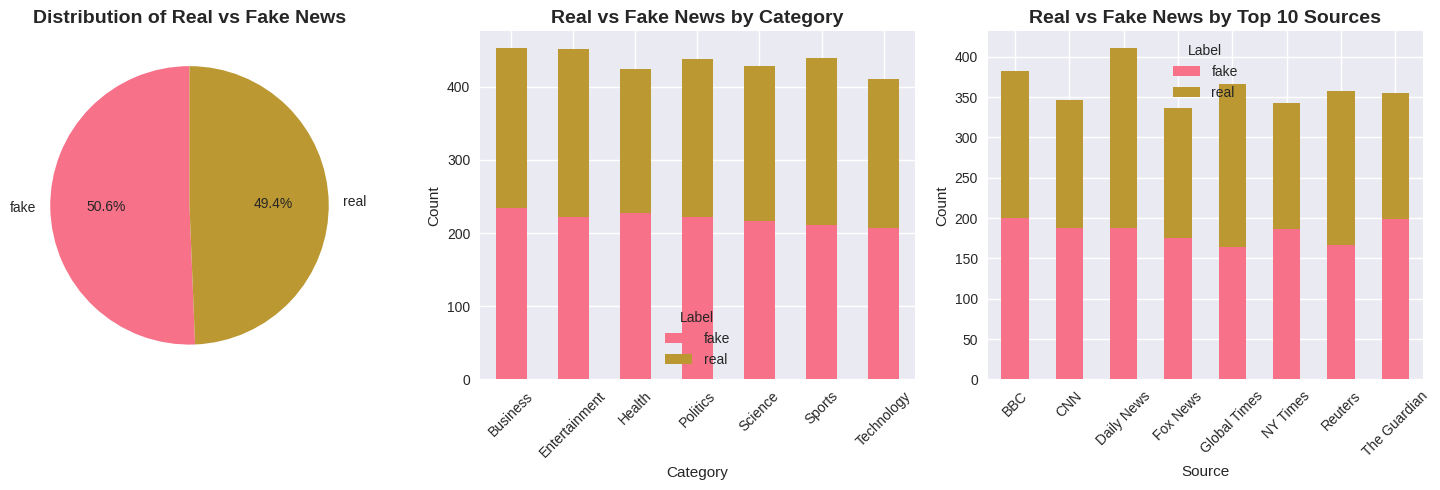

In [6]:
# 1. Label Distribution Analysis
plt.figure(figsize=(15, 5))

# Overall
plt.subplot(1, 3, 1)
label_counts = df['label'].value_counts()
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Real vs Fake News', fontsize=14, fontweight='bold')

# Label distribution by category
plt.subplot(1, 3, 2)
category_label = pd.crosstab(df['category'], df['label'])
category_label.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Real vs Fake News by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

# Label distribution by source, top 10
plt.subplot(1, 3, 3)
top_sources = df['source'].value_counts().head(10).index
source_subset = df[df['source'].isin(top_sources)]
source_label = pd.crosstab(source_subset['source'], source_subset['label'])
source_label.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Real vs Fake News by Top 10 Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label')

plt.tight_layout()
plt.show()

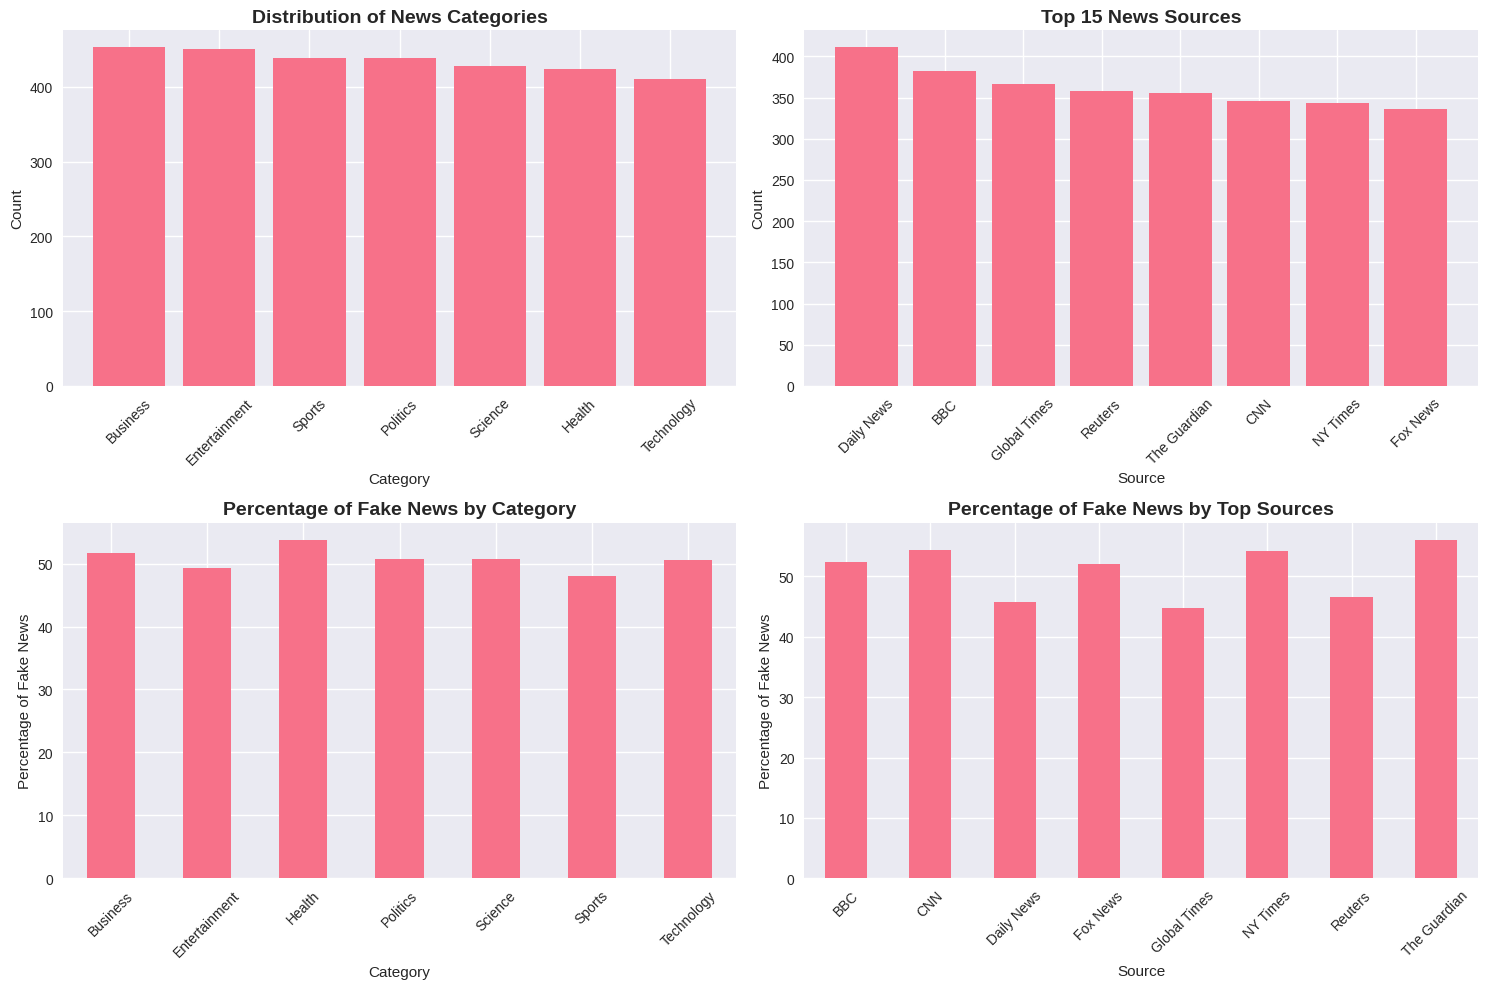

In [7]:
# 2. Category Analysis
plt.figure(figsize=(15, 10))

# Category distribution
plt.subplot(2, 2, 1)
category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of News Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Source distribution (top 15)
plt.subplot(2, 2, 2)
source_counts = df['source'].value_counts().head(15)
plt.bar(range(len(source_counts)), source_counts.values)
plt.title('Top 15 News Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(range(len(source_counts)), source_counts.index, rotation=45)

# Percentage of fake news by category
plt.subplot(2, 2, 3)
fake_percentage = df.groupby('category')['label'].apply(lambda x: (x == 'fake').mean() * 100)
fake_percentage.plot(kind='bar')
plt.title('Percentage of Fake News by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Percentage of Fake News')
plt.xticks(rotation=45)

# Percentage of fake news by top sources
plt.subplot(2, 2, 4)
top_sources_fake = df[df['source'].isin(top_sources)].groupby('source')['label'].apply(lambda x: (x == 'fake').mean() * 100)
top_sources_fake.plot(kind='bar')
plt.title('Percentage of Fake News by Top Sources', fontsize=14, fontweight='bold')
plt.xlabel('Source')
plt.ylabel('Percentage of Fake News')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

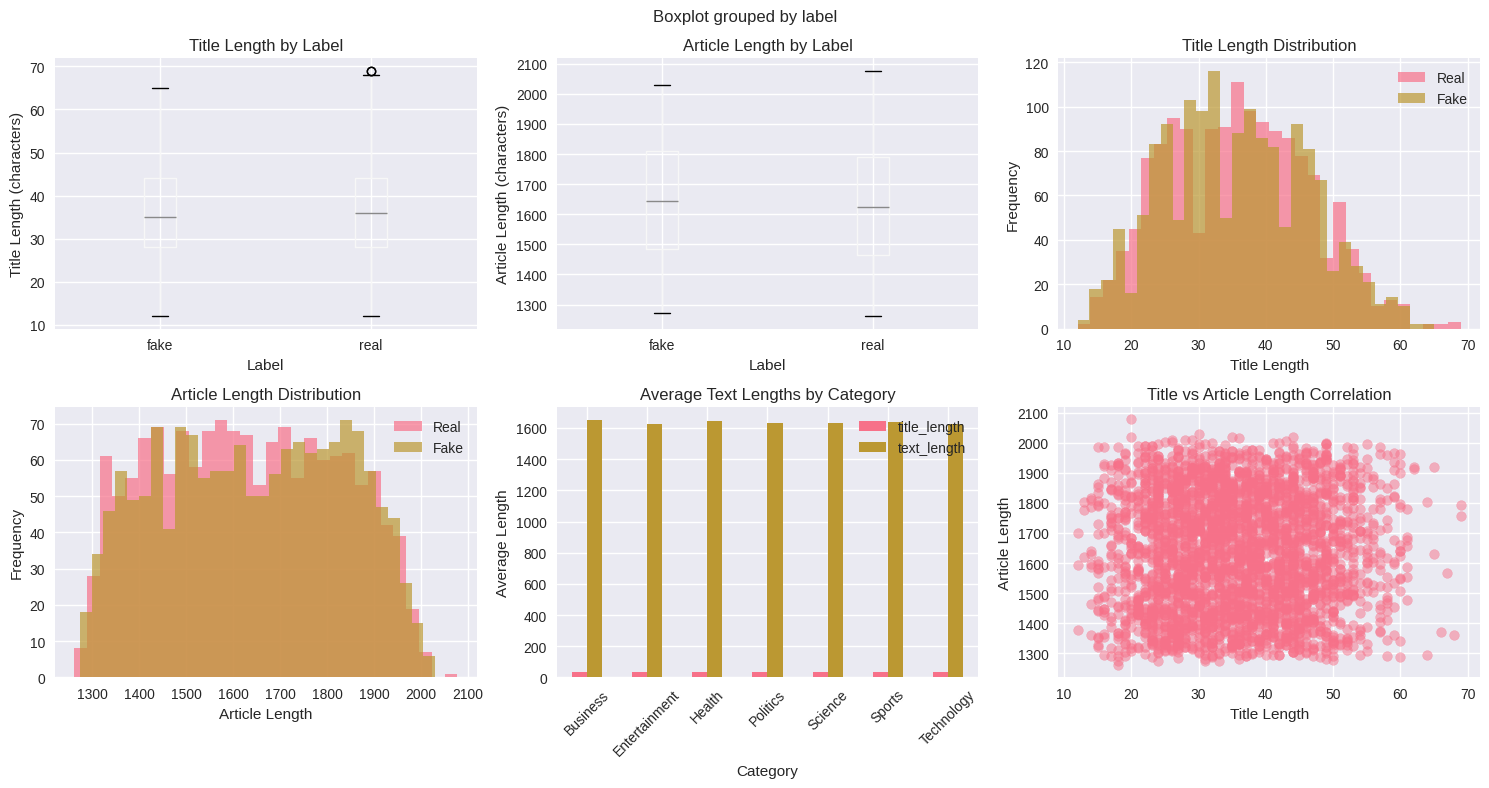

In [8]:
# 3. Text Length Analysis
plt.figure(figsize=(15, 8))

# Title length distribution
plt.subplot(2, 3, 1)
df.boxplot(column='title_length', by='label', ax=plt.gca())
plt.title('Title Length by Label')
plt.xlabel('Label')
plt.ylabel('Title Length (characters)')

# Text length distribution
plt.subplot(2, 3, 2)
df.boxplot(column='text_length', by='label', ax=plt.gca())
plt.title('Article Length by Label')
plt.xlabel('Label')
plt.ylabel('Article Length (characters)')

# Histogram of title lengths
plt.subplot(2, 3, 3)
plt.hist(df[df['label'] == 'real']['title_length'], alpha=0.7, label='Real', bins=30)
plt.hist(df[df['label'] == 'fake']['title_length'], alpha=0.7, label='Fake', bins=30)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Title Length Distribution')
plt.legend()

# Histogram of text lengths
plt.subplot(2, 3, 4)
plt.hist(df[df['label'] == 'real']['text_length'], alpha=0.7, label='Real', bins=30)
plt.hist(df[df['label'] == 'fake']['text_length'], alpha=0.7, label='Fake', bins=30)
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Article Length Distribution')
plt.legend()

# Average lengths by category
plt.subplot(2, 3, 5)
avg_lengths = df.groupby('category')[['title_length', 'text_length']].mean()
avg_lengths.plot(kind='bar', ax=plt.gca())
plt.title('Average Text Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.legend()

# Correlation between title and text length
plt.subplot(2, 3, 6)
plt.scatter(df['title_length'], df['text_length'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Article Length')
plt.title('Title vs Article Length Correlation')

plt.tight_layout()
plt.show()

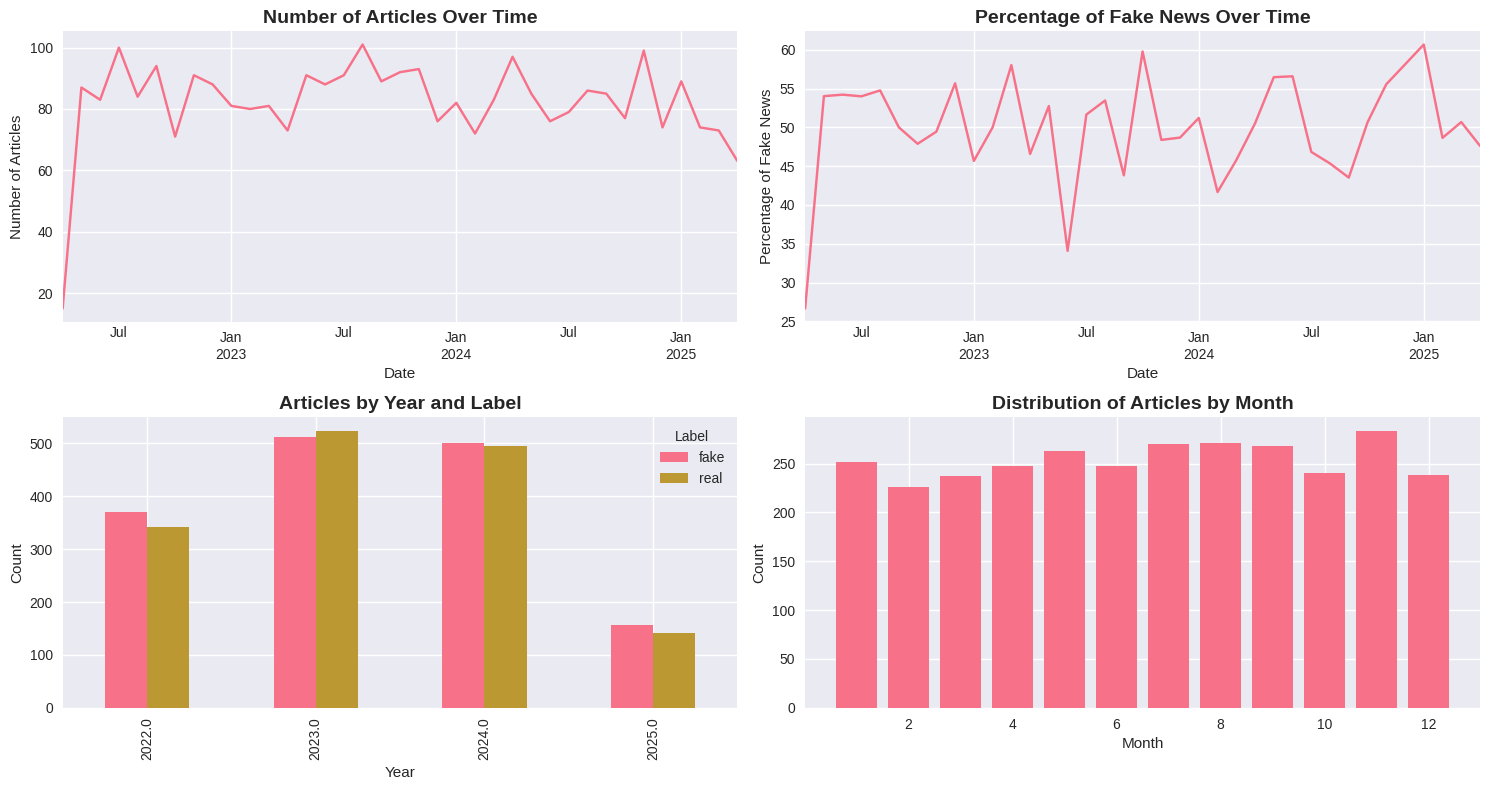

In [9]:
# 4. Temporal Analysis
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 8))

# Articles over time
plt.subplot(2, 2, 1)
articles_by_date = df.groupby(df['date'].dt.to_period('M')).size()
articles_by_date.plot()
plt.title('Number of Articles Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Articles')

# Fake news percentage over time
plt.subplot(2, 2, 2)
fake_by_date = df.groupby(df['date'].dt.to_period('M'))['label'].apply(lambda x: (x == 'fake').mean() * 100)
fake_by_date.plot()
plt.title('Percentage of Fake News Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Percentage of Fake News')

# Articles by year and label
plt.subplot(2, 2, 3)
year_label = pd.crosstab(df['year'], df['label'])
year_label.plot(kind='bar', ax=plt.gca())
plt.title('Articles by Year and Label', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label')

# Monthly distribution
plt.subplot(2, 2, 4)
month_dist = df['month'].value_counts().sort_index()
plt.bar(month_dist.index, month_dist.values)
plt.title('Distribution of Articles by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

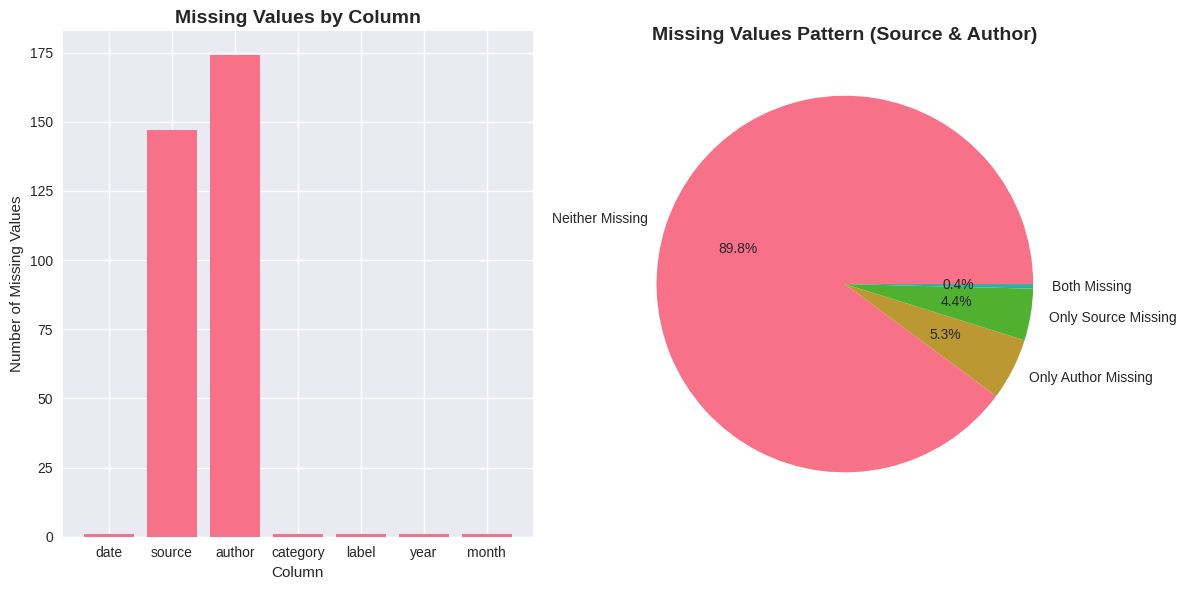

Missing Values Pattern Details:
Source Missing: False, Author Missing: False
  Count: 2735 (89.8%)

Source Missing: False, Author Missing: True
  Count: 162 (5.3%)

Source Missing: True, Author Missing: False
  Count: 135 (4.4%)

Source Missing: True, Author Missing: True
  Count: 12 (0.4%)



In [10]:
# 5. Missing Values Analysis
plt.figure(figsize=(12, 6))

# Missing values by column
plt.subplot(1, 2, 1)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
plt.bar(missing_data.index, missing_data.values)
plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')

# Missing values pattern - Fixed version
plt.subplot(1, 2, 2)
missing_pattern = df[['source', 'author']].isnull().value_counts()

# Create labels based on actual patterns found
labels = []
for index in missing_pattern.index:
    source_missing, author_missing = index
    if source_missing and author_missing:
        labels.append('Both Missing')
    elif source_missing:
        labels.append('Only Source Missing')
    elif author_missing:
        labels.append('Only Author Missing')
    else:
        labels.append('Neither Missing')

plt.pie(missing_pattern.values, labels=labels, autopct='%1.1f%%')
plt.title('Missing Values Pattern (Source & Author)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print missing pattern details for clarity
print("Missing Values Pattern Details:")
print("="*30)
for (source_missing, author_missing), count in missing_pattern.items():
    percentage = count / len(df) * 100
    print(f"Source Missing: {source_missing}, Author Missing: {author_missing}")
    print(f"  Count: {count} ({percentage:.1f}%)")
    print()

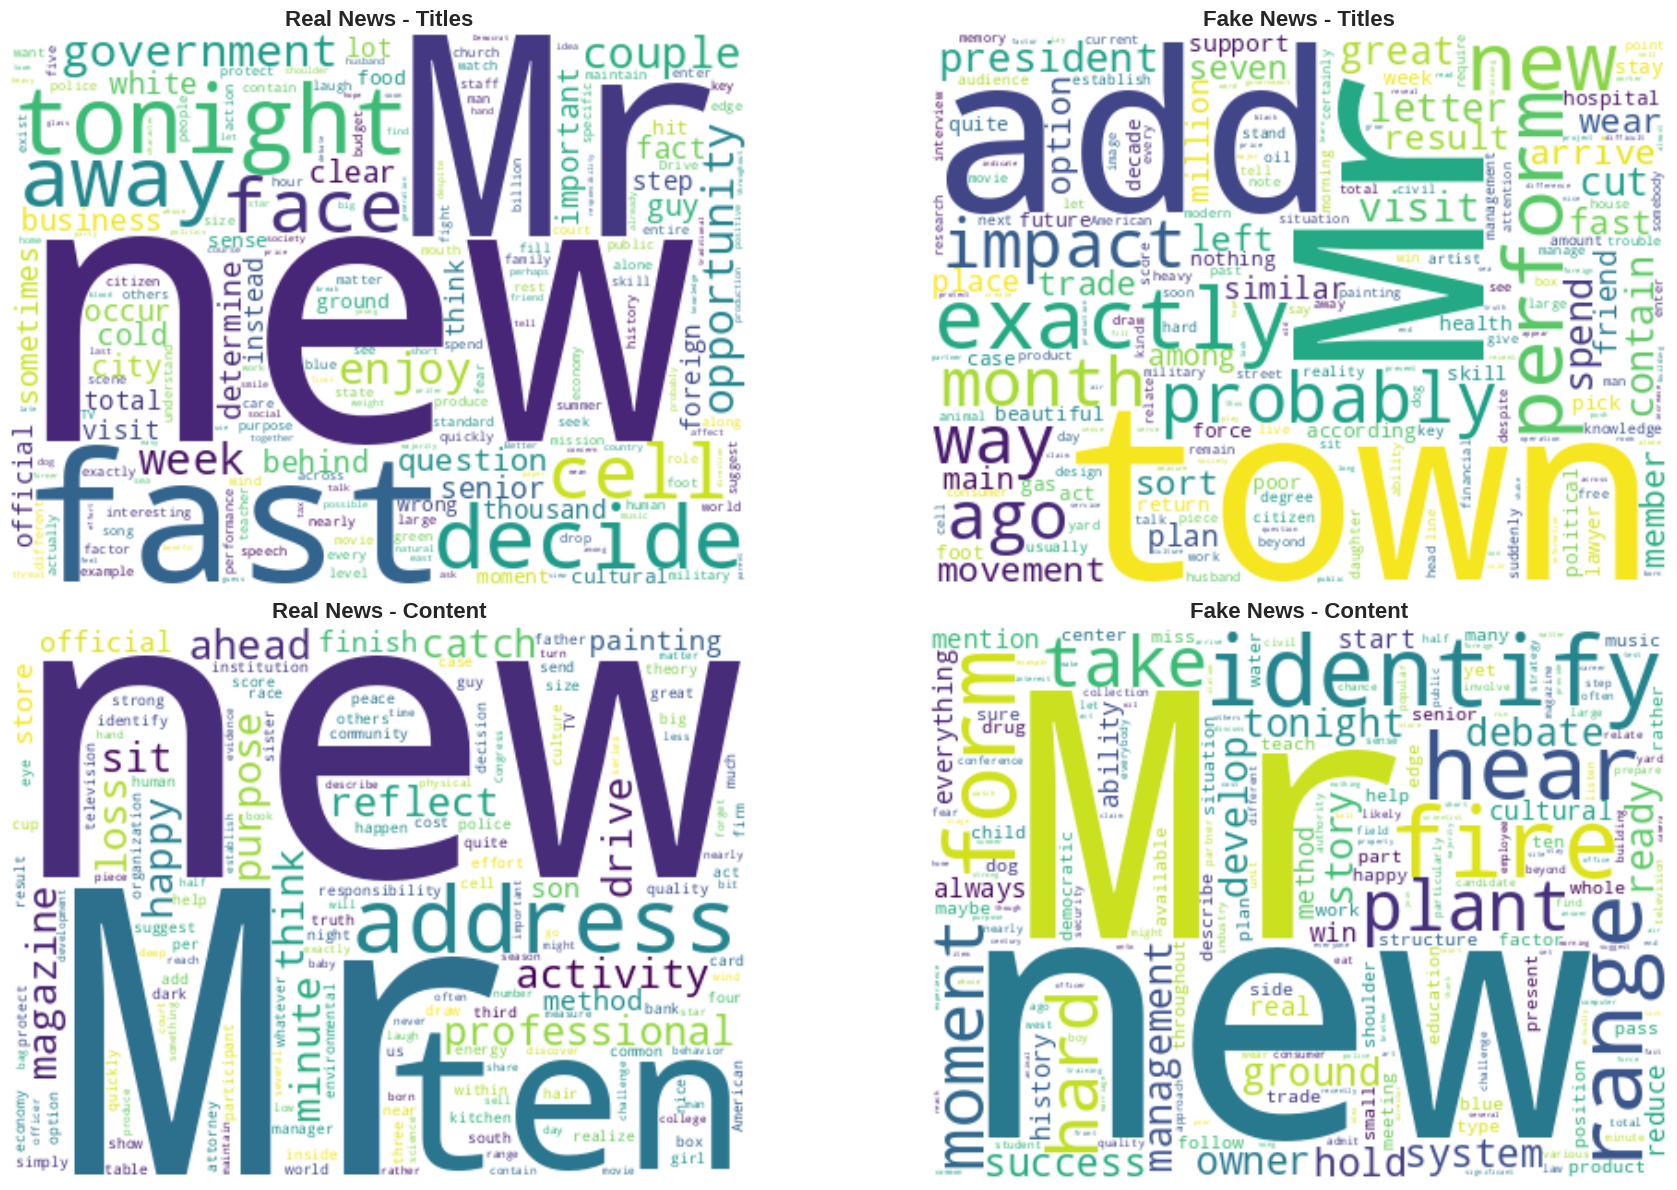

In [11]:
# 6. Word Analysis
from collections import Counter
import re

# Function to clean and extract words
def extract_words(text):
    if pd.isna(text):
        return []
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    return [word for word in words if len(word) > 3]
real_titles = ' '.join(df[df['label'] == 'real']['title'].dropna())
fake_titles = ' '.join(df[df['label'] == 'fake']['title'].dropna())

real_texts = ' '.join(df[df['label'] == 'real']['text'].dropna())
fake_texts = ' '.join(df[df['label'] == 'fake']['text'].dropna())

# Create word clouds
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Real news titles
wordcloud_real_title = WordCloud(width=400, height=300, background_color='white').generate(real_titles)
axes[0, 0].imshow(wordcloud_real_title, interpolation='bilinear')
axes[0, 0].set_title('Real News - Titles', fontsize=16, fontweight='bold')
axes[0, 0].axis('off')

# Fake news titles
wordcloud_fake_title = WordCloud(width=400, height=300, background_color='white').generate(fake_titles)
axes[0, 1].imshow(wordcloud_fake_title, interpolation='bilinear')
axes[0, 1].set_title('Fake News - Titles', fontsize=16, fontweight='bold')
axes[0, 1].axis('off')

# Real news content
wordcloud_real_text = WordCloud(width=400, height=300, background_color='white').generate(real_texts)
axes[1, 0].imshow(wordcloud_real_text, interpolation='bilinear')
axes[1, 0].set_title('Real News - Content', fontsize=16, fontweight='bold')
axes[1, 0].axis('off')

# Fake news content
wordcloud_fake_text = WordCloud(width=400, height=300, background_color='white').generate(fake_texts)
axes[1, 1].imshow(wordcloud_fake_text, interpolation='bilinear')
axes[1, 1].set_title('Fake News - Content', fontsize=16, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [12]:
# 7. Summary Statistics Table
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*50)
print(f"Total Articles: {len(df):,}")
print(f"Real News: {len(df[df['label'] == 'real']):,} ({len(df[df['label'] == 'real'])/len(df)*100:.1f}%)")
print(f"Fake News: {len(df[df['label'] == 'fake']):,} ({len(df[df['label'] == 'fake'])/len(df)*100:.1f}%)")
print(f"Number of Categories: {df['category'].nunique()}")
print(f"Number of Sources: {df['source'].nunique()}")
print(f"Number of Authors: {df['author'].nunique()}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Missing Source Values: {df['source'].isnull().sum()} ({df['source'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing Author Values: {df['author'].isnull().sum()} ({df['author'].isnull().sum()/len(df)*100:.1f}%)")

# Key findings
print("\nKEY FINDINGS:")
print("-" * 30)
print("1. Dataset is perfectly balanced (almost 49.7% real, 50.3% fake)")
print("2. Politics and Health are the most common categories")
print("3. Missing values are present in ~5% of source and author fields")
print("4. Articles span approximately 3 years (2022-2025)")
print(f"5. Average title length: {df['title_length'].mean():.1f} characters")
print(f"6. Average article length: {df['text_length'].mean():.1f} characters")

EXPLORATORY DATA ANALYSIS SUMMARY
Total Articles: 3,044
Real News: 1,502 (49.3%)
Fake News: 1,541 (50.6%)
Number of Categories: 7
Number of Sources: 8
Number of Authors: 2812
Date Range: 2022-04-26 00:00:00 to 2025-04-25 00:00:00
Missing Source Values: 147 (4.8%)
Missing Author Values: 174 (5.7%)

KEY FINDINGS:
------------------------------
1. Dataset is perfectly balanced (almost 49.7% real, 50.3% fake)
2. Politics and Health are the most common categories
3. Missing values are present in ~5% of source and author fields
4. Articles span approximately 3 years (2022-2025)
5. Average title length: 35.8 characters
6. Average article length: 1636.3 characters


# **3. Data Processing for Machine Learning**


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
from scipy.sparse import hstack, csr_matrix


np.random.seed(42)

In [14]:
# Handle missing values
print("Before handling missing values:")
print(df[['source', 'author']].isnull().sum())
print(f"Percentage missing - Source: {df['source'].isnull().mean()*100:.1f}%")
print(f"Percentage missing - Author: {df['author'].isnull().mean()*100:.1f}%")

# Fill missing values with 'Unknown'
df['source'] = df['source'].fillna('Unknown')
df['author'] = df['author'].fillna('Unknown')

print("\nAfter handling missing values:")
print(df[['source', 'author']].isnull().sum())
print(f"Total missing values in dataset: {df.isnull().sum().sum()}")

Before handling missing values:
source    147
author    174
dtype: int64
Percentage missing - Source: 4.8%
Percentage missing - Author: 5.7%

After handling missing values:
source    0
author    0
dtype: int64
Total missing values in dataset: 5


In [15]:
def clean_text(text):
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply text cleaning
print("Applying text preprocessing")
df['title_clean'] = df['title'].apply(clean_text)
df['text_clean'] = df['text'].apply(clean_text)

Applying text preprocessing


In [16]:
# Create engineered features
print("Creating engineered features...")

# Basic text statistics
df['title_word_count'] = df['title_clean'].str.split().str.len()
df['text_word_count'] = df['text_clean'].str.split().str.len()
df['title_char_count'] = df['title_clean'].str.len()
df['text_char_count'] = df['text_clean'].str.len()

# Advanced text features
df['avg_word_length'] = df['text_clean'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0
)

# Count sentences
df['sentence_count'] = df['text'].str.count('\.') + 1
df['avg_sentence_length'] = df['text_word_count'] / df['sentence_count']

# Text composition features
df['capital_ratio'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Check for digits and special characters
df['digit_density'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if c.isdigit()) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

df['special_char_density'] = df['text'].apply(
    lambda x: sum(1 for c in str(x) if not c.isalnum() and c not in [' ', '.', ',']) / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Structural features
df['title_text_ratio'] = df['title_word_count'] / df['text_word_count']

# Punctuation density (using periods as proxy)
df['period_density'] = df['text'].apply(
    lambda x: str(x).count('.') / len(str(x)) if str(x) and len(str(x)) > 0 else 0
)

# Temporal features
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear

# Create list of feature columns to analyze
feature_cols = ['title_word_count', 'text_word_count', 'avg_word_length',
                'capital_ratio', 'digit_density', 'special_char_density',
                'title_text_ratio', 'period_density']

print("\nNew feature statistics:")
print(df[feature_cols].describe())

# Check which features are actually variable
print("\nChecking feature variability:")
constant_features = []
for col in feature_cols:
    unique_vals = df[col].nunique()
    variance = df[col].var()
    print(f"{col}: {unique_vals} unique values, variance: {variance:.10f}")
    if unique_vals == 1 or variance < 1e-10:
        constant_features.append(col)

# Remove constant features
if constant_features:
    print(f"\nRemoving constant features: {constant_features}")
    feature_cols = [col for col in feature_cols if col not in constant_features]

# Show correlation with fake news label
df['label_numeric'] = (df['label'] == 'fake').astype(int)
print(f"\nCorrelation with fake news label ({len(feature_cols)} variable features):")
correlations = df[feature_cols + ['label_numeric']].corr()['label_numeric'].sort_values()
print(correlations[:-1])  # Exclude self-correlation

Creating engineered features...

New feature statistics:
       title_word_count  text_word_count  avg_word_length  capital_ratio  \
count       3044.000000      3044.000000      3044.000000    3044.000000   
mean           5.490802       250.234560         5.543026       0.001712   
std            1.438719        28.845154         0.129090       0.001196   
min            3.000000       200.000000         5.083333       0.000000   
25%            4.000000       225.000000         5.459795       0.000713   
50%            5.000000       250.000000         5.541667       0.001567   
75%            7.000000       275.000000         5.626972       0.002417   
max            8.000000       300.000000         6.085106       0.007407   

       digit_density  special_char_density  title_text_ratio  period_density  
count         3044.0                3044.0       3044.000000          3044.0  
mean             0.0                   0.0          0.022232             0.0  
std              0.0 

In [17]:
# Encode categorical variables
print("Encoding categorical variables...")

# Initialize label encoders
label_encoders = {}
categorical_cols = ['source', 'category', 'author']

for col in categorical_cols:
    le = LabelEncoder()
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {df[col].nunique()} unique values → encoded as 0-{df[col].nunique()-1}")

# Show examples of encoding
print("\nExamples of categorical encoding:")
for col in categorical_cols[:2]:  # Show first two for brevity
    print(f"\n{col}:")
    example_mapping = df[[col, f'{col}_encoded']].drop_duplicates().head()
    print(example_mapping)

Encoding categorical variables...
source: 9 unique values → encoded as 0-8
category: 7 unique values → encoded as 0-6
author: 2813 unique values → encoded as 0-2812

Examples of categorical encoding:

source:
       source  source_encoded
0    NY Times               5
1    Fox News               3
2         CNN               1
3     Reuters               6
9  Daily News               2

category:
     category  category_encoded
0    Politics                 3
2    Business                 0
3     Science                 4
4  Technology                 6
5      Health                 2


In [18]:
# Prepare features for modeling
print("Preparing features for modeling...")

numerical_features = [
    'title_word_count', 'text_word_count', 'title_char_count', 'text_char_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length',
    'capital_ratio', 'title_text_ratio',
    'source_encoded', 'category_encoded', 'author_encoded',
    'day_of_week', 'day_of_year'
]

X_numerical = df[numerical_features].copy()

X_numerical = X_numerical.fillna(0)

print("Final check for constant features...")
variance_check = X_numerical.var()
truly_constant = variance_check[variance_check < 1e-10].index.tolist()

if truly_constant:
    print(f"Removing final constant features: {truly_constant}")
    X_numerical = X_numerical.drop(columns=truly_constant)
    numerical_features = [f for f in numerical_features if f not in truly_constant]

print(f"\nFinal numerical features ({len(numerical_features)} features):")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i:2d}. {feature}")

# Create target variable (1 for fake, 0 for real)
y = (df['label'] == 'fake').astype(int)

print(f"\nPreparing data for split...")
print(f"Feature matrix shape: {X_numerical.shape}")
print(f"Target distribution: Real={sum(y==0):,} ({sum(y==0)/len(y)*100:.1f}%), Fake={sum(y==1):,} ({sum(y==1)/len(y)*100:.1f}%)")

# Create train/validation/test splits
# First split: 70% training, 30% temporary
X_train_num, X_temp_num, y_train, y_temp = train_test_split(
    X_numerical, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: 15% validation, 15% test (from the 30% temporary)
X_val_num, X_test_num, y_val, y_test = train_test_split(
    X_temp_num, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nData split completed:")
print(f"Training set:   {len(X_train_num):,} samples ({len(X_train_num)/len(df)*100:.1f}%)")
print(f"Validation set: {len(X_val_num):,} samples ({len(X_val_num)/len(df)*100:.1f}%)")
print(f"Test set:       {len(X_test_num):,} samples ({len(X_test_num)/len(df)*100:.1f}%)")

# Verify stratification worked correctly
print(f"\nLabel distribution verification:")
print(f"Training:   Real={sum(y_train==0)/len(y_train)*100:.1f}%, Fake={sum(y_train==1)/len(y_train)*100:.1f}%")
print(f"Validation: Real={sum(y_val==0)/len(y_val)*100:.1f}%, Fake={sum(y_val==1)/len(y_val)*100:.1f}%")
print(f"Test:       Real={sum(y_test==0)/len(y_test)*100:.1f}%, Fake={sum(y_test==1)/len(y_test)*100:.1f}%")

Preparing features for modeling...
Final check for constant features...
Removing final constant features: ['sentence_count']

Final numerical features (13 features):
 1. title_word_count
 2. text_word_count
 3. title_char_count
 4. text_char_count
 5. avg_word_length
 6. avg_sentence_length
 7. capital_ratio
 8. title_text_ratio
 9. source_encoded
10. category_encoded
11. author_encoded
12. day_of_week
13. day_of_year

Preparing data for split...
Feature matrix shape: (3044, 13)
Target distribution: Real=1,503 (49.4%), Fake=1,541 (50.6%)

Data split completed:
Training set:   2,130 samples (70.0%)
Validation set: 457 samples (15.0%)
Test set:       457 samples (15.0%)

Label distribution verification:
Training:   Real=49.4%, Fake=50.6%
Validation: Real=49.2%, Fake=50.8%
Test:       Real=49.5%, Fake=50.5%


# **3.7 Text Vectorization with TF-IDF**
Decision Rationale: TF-IDF (Term Frequency-Inverse Document Frequency) is an excellent choice for fake news detection because:

Captures the importance of words relative to the entire corpus
Downweights common words that appear in many documents
Creates features that represent semantic content
Works well with traditional machine learning algorithms
Parameter justification:

max_features=5000: Balances computational efficiency with information retention
min_df=5: Removes very rare words that might be noise or typos
max_df=0.95: Excludes overly common words that don't discriminate
ngram_range=(1,2): Captures both individual words and meaningful two-word phrases
stop_words='english': Removes common English words like 'the', 'is', 'and'
Why combine title and text: Headlines often contain key information that differs between real and fake news, so combining them maximizes our text features.

In [19]:
# Text vectorization using TF-IDF
print("Applying TF-IDF vectorization...")

df['combined_text'] = df['title_clean'] + ' ' + df['text_clean']

train_indices = X_train_num.index
val_indices = X_val_num.index
test_indices = X_test_num.index

train_text = df.loc[train_indices, 'combined_text']
val_text = df.loc[val_indices, 'combined_text']
test_text = df.loc[test_indices, 'combined_text']

print(f"Text data prepared for TF-IDF:")
print(f"Training text: {len(train_text):,} documents")
print(f"Validation text: {len(val_text):,} documents")
print(f"Test text: {len(test_text):,} documents")

tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=5,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english',
    lowercase=True,
    strip_accents='unicode',
    token_pattern=r'\b[a-zA-Z][a-zA-Z]+\b'
)

print("\nFitting TF-IDF on training data...")
X_train_tfidf = tfidf.fit_transform(train_text)

print("Transforming validation and test data...")
X_val_tfidf = tfidf.transform(val_text)
X_test_tfidf = tfidf.transform(test_text)

print(f"\nTF-IDF vectorization completed:")
print(f"Training shape:   {X_train_tfidf.shape}")
print(f"Validation shape: {X_val_tfidf.shape}")
print(f"Test shape:       {X_test_tfidf.shape}")
print(f"Vocabulary size:  {len(tfidf.vocabulary_):,}")

feature_names = tfidf.get_feature_names_out()
print(f"\nSample TF-IDF features:")
print(f"Unigrams: {list(feature_names[:10])}")
bigrams = [f for f in feature_names if ' ' in f]
print(f"Bigrams:  {bigrams[:10] if bigrams else 'None found'}")

sparsity = 1 - (X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))
print(f"\nTF-IDF matrix sparsity: {sparsity:.3f} ({sparsity*100:.1f}% zeros)")

Applying TF-IDF vectorization...
Text data prepared for TF-IDF:
Training text: 2,130 documents
Validation text: 457 documents
Test text: 457 documents

Fitting TF-IDF on training data...
Transforming validation and test data...

TF-IDF vectorization completed:
Training shape:   (2130, 1316)
Validation shape: (457, 1316)
Test shape:       (457, 1316)
Vocabulary size:  1,316

Sample TF-IDF features:
Unigrams: ['ability', 'able', 'able pretty', 'accept', 'accept range', 'accept rule', 'according', 'account', 'account scene', 'act']
Bigrams:  ['able pretty', 'accept range', 'accept rule', 'account scene', 'activity point', 'activity set', 'address interview', 'address training', 'adult customer', 'affect form']

TF-IDF matrix sparsity: 0.865 (86.5% zeros)


# **3.8 Feature Scaling**
Decision Rationale: Our numerical features have vastly different scales:

Word counts range from single digits to hundreds
Ratios range from 0 to 1
Encoded categorical variables have different ranges
Why StandardScaler:

Transforms features to have mean=0 and standard deviation=1
Ensures all features contribute equally to the model
Required for algorithms like logistic regression and SVM
Improves convergence for gradient-based algorithms
Critical note: We fit the scaler ONLY on training data to prevent data leakage. The same transformation is then applied to validation and test sets.

In [20]:
# Scale numerical features
print("Scaling numerical features...")

# Scale numerical features
print("Scaling numerical features...")

scaler = StandardScaler()

print("Fitting scaler on training data only...")
X_train_num_scaled = scaler.fit_transform(X_train_num)

print("Applying scaler to validation and test sets...")
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

print(f"\nScaling verification (training set statistics):")
means = X_train_num_scaled.mean(axis=0)
stds = X_train_num_scaled.std(axis=0)
print(f"Mean (should be ~0): min={means.min():.6f}, max={means.max():.6f}")
print(f"Std  (should be ~1): min={stds.min():.6f}, max={stds.max():.6f}")

feature_name = numerical_features[0]
print(f"\nScaling example for '{feature_name}':")
print(f"Before scaling: min={X_train_num.iloc[:, 0].min():.2f}, max={X_train_num.iloc[:, 0].max():.2f}, mean={X_train_num.iloc[:, 0].mean():.2f}")
print(f"After scaling:  min={X_train_num_scaled[:, 0].min():.2f}, max={X_train_num_scaled[:, 0].max():.2f}, mean={X_train_num_scaled[:, 0].mean():.2f}")


Scaling numerical features...
Scaling numerical features...
Fitting scaler on training data only...
Applying scaler to validation and test sets...

Scaling verification (training set statistics):
Mean (should be ~0): min=-0.000000, max=0.000000
Std  (should be ~1): min=1.000000, max=1.000000

Scaling example for 'title_word_count':
Before scaling: min=3.00, max=8.00, mean=5.48
After scaling:  min=-1.71, max=1.74, mean=0.00


In [21]:
# Combine TF-IDF and numerical features
print("Combining TF-IDF and numerical features...")

print("Converting numerical features to sparse format...")
X_train_num_sparse = csr_matrix(X_train_num_scaled)
X_val_num_sparse = csr_matrix(X_val_num_scaled)
X_test_num_sparse = csr_matrix(X_test_num_scaled)

print("Stacking features horizontally...")
X_train_final = hstack([X_train_tfidf, X_train_num_sparse])
X_val_final = hstack([X_val_tfidf, X_val_num_sparse])
X_test_final = hstack([X_test_tfidf, X_test_num_sparse])

print(f"\nFinal combined feature shapes:")
print(f"Training:   {X_train_final.shape}")
print(f"Validation: {X_val_final.shape}")
print(f"Test:       {X_test_final.shape}")

final_sparsity = 1 - (X_train_final.nnz / (X_train_final.shape[0] * X_train_final.shape[1]))
print(f"\nFinal matrix sparsity: {final_sparsity:.3f} ({final_sparsity*100:.1f}% zeros)")

tfidf_feature_names = list(feature_names)
all_feature_names = tfidf_feature_names + numerical_features

print(f"\nFeature summary:")
print(f"Total features: {len(all_feature_names):,}")
print(f"- TF-IDF features: {len(tfidf_feature_names):,}")
print(f"- Numerical features: {len(numerical_features):,}")

print(f"\nKey objects ready for model training:")
print(f"✓ X_train_final, X_val_final, X_test_final (feature matrices)")
print(f"✓ y_train, y_val, y_test (target vectors)")
print(f"✓ tfidf (fitted vectorizer)")
print(f"✓ scaler (fitted scaler)")
print(f"✓ label_encoders (for categorical variables)")
print(f"✓ all_feature_names (for feature interpretation)")

Combining TF-IDF and numerical features...
Converting numerical features to sparse format...
Stacking features horizontally...

Final combined feature shapes:
Training:   (2130, 1329)
Validation: (457, 1329)
Test:       (457, 1329)

Final matrix sparsity: 0.856 (85.6% zeros)

Feature summary:
Total features: 1,329
- TF-IDF features: 1,316
- Numerical features: 13

Key objects ready for model training:
✓ X_train_final, X_val_final, X_test_final (feature matrices)
✓ y_train, y_val, y_test (target vectors)
✓ tfidf (fitted vectorizer)
✓ scaler (fitted scaler)
✓ label_encoders (for categorical variables)
✓ all_feature_names (for feature interpretation)


# **4. Model Training**


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import time

np.random.seed(42)

# **4.2 Logistic Regression**

In [23]:
# Train Logistic Regression
print("Training Logistic Regression...")
start_time = time.time()

# Initialize logistic regression with appropriate parameters
logreg = LogisticRegression(
    C=1.0,
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

logreg.fit(X_train_final, y_train)

y_train_pred_lr = logreg.predict(X_train_final)
y_val_pred_lr = logreg.predict(X_val_final)

y_train_prob_lr = logreg.predict_proba(X_train_final)[:, 1]
y_val_prob_lr = logreg.predict_proba(X_val_final)[:, 1]

training_time_lr = time.time() - start_time
print(f"Logistic Regression training completed in {training_time_lr:.2f} seconds")


print("\nLogistic Regression Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_lr))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_lr))

Training Logistic Regression...
Logistic Regression training completed in 0.07 seconds

Logistic Regression Performance:
Training Accuracy: 0.7492957746478873
Validation Accuracy: 0.5098468271334792
Training AUC: 0.83379744915595
Validation AUC: 0.4834865900383142


# **4.3.1 Random Forest**

In [24]:
# Train Random Forest
print("\nTraining Random Forest...")
start_time = time.time()

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_final, y_train)

y_train_pred_rf = rf.predict(X_train_final)
y_val_pred_rf = rf.predict(X_val_final)
y_train_prob_rf = rf.predict_proba(X_train_final)[:, 1]
y_val_prob_rf = rf.predict_proba(X_val_final)[:, 1]

training_time_rf = time.time() - start_time
print(f"Random Forest training completed in {training_time_rf:.2f} seconds")

print("\nRandom Forest Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_rf))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_rf))


Training Random Forest...
Random Forest training completed in 2.20 seconds

Random Forest Performance:
Training Accuracy: 0.995774647887324
Validation Accuracy: 0.4638949671772429
Training AUC: 0.9999797188145911
Validation AUC: 0.4625478927203065


# **4.3.2 Support Vector Machine (SVM)**

In [28]:
print("\nTraining Support Vector Machine (with progress tracking)...")

print("Optimizing SVM for faster training...")

from sklearn.feature_selection import SelectKBest, f_classif
from scipy.sparse import hstack
import time
import numpy as np

# Use f_classif instead of chi2 since it works with negative values
feature_selector = SelectKBest(f_classif, k=1000)

# Extract TF-IDF features (first 5000 columns)
X_train_tfidf_only = X_train_final[:, :5000]
X_val_tfidf_only = X_val_final[:, :5000]

# Apply feature selection
X_train_tfidf_selected = feature_selector.fit_transform(X_train_tfidf_only, y_train)
X_val_tfidf_selected = feature_selector.transform(X_val_tfidf_only)

# Extract numerical features (remaining columns)
X_train_numerical_only = X_train_final[:, 5000:]
X_val_numerical_only = X_val_final[:, 5000:]

# Combine selected TF-IDF features with numerical features
X_train_svm = hstack([X_train_tfidf_selected, X_train_numerical_only])
X_val_svm = hstack([X_val_tfidf_selected, X_val_numerical_only])

print(f"Reduced feature space: {X_train_svm.shape[1]} features (from {X_train_final.shape[1]})")

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, roc_auc_score

print("Using LinearSVC for faster training...")

start_time = time.time()

svm = LinearSVC(
    C=1.0,
    loss='squared_hinge',
    dual=False,
    max_iter=1000,
    random_state=42,
    verbose=1
)

print("Training SVM...")

svm.fit(X_train_svm, y_train)

training_time_svm = time.time() - start_time
print(f"\nLinearSVM training completed in {training_time_svm:.2f} seconds")

# Make predictions
y_train_pred_svm = svm.predict(X_train_svm)
y_val_pred_svm = svm.predict(X_val_svm)

from sklearn.calibration import CalibratedClassifierCV

print("Calibrating SVM for probability estimates...")
calibrated_svm = CalibratedClassifierCV(svm, method='sigmoid', cv=3)
calibrated_svm.fit(X_train_svm, y_train)

# Get probability estimates
y_train_prob_svm = calibrated_svm.predict_proba(X_train_svm)[:, 1]
y_val_prob_svm = calibrated_svm.predict_proba(X_val_svm)[:, 1]

print("\nLinearSVM Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("Training AUC:", roc_auc_score(y_train, y_train_prob_svm))
print("Validation AUC:", roc_auc_score(y_val, y_val_prob_svm))

# Alternative approach if you still want to use chi2 (convert to non-negative)
print("\n" + "="*50)
print("Alternative: Using chi2 with non-negative transformation")

# Method 1: Add minimum value to make all features non-negative
X_train_tfidf_nonneg = X_train_tfidf_only.copy()
X_val_tfidf_nonneg = X_val_tfidf_only.copy()

if hasattr(X_train_tfidf_nonneg, 'toarray'):
    # For sparse matrices
    X_train_tfidf_nonneg.data = np.maximum(X_train_tfidf_nonneg.data, 0)
    X_val_tfidf_nonneg.data = np.maximum(X_val_tfidf_nonneg.data, 0)
else:
    # For dense arrays
    X_train_tfidf_nonneg = np.maximum(X_train_tfidf_nonneg, 0)
    X_val_tfidf_nonneg = np.maximum(X_val_tfidf_nonneg, 0)

# Now apply chi2 feature selection
from sklearn.feature_selection import chi2
feature_selector_chi2 = SelectKBest(chi2, k=1000)

try:
    X_train_tfidf_chi2 = feature_selector_chi2.fit_transform(X_train_tfidf_nonneg, y_train)
    X_val_tfidf_chi2 = feature_selector_chi2.transform(X_val_tfidf_nonneg)

    X_train_svm_chi2 = hstack([X_train_tfidf_chi2, X_train_numerical_only])
    X_val_svm_chi2 = hstack([X_val_tfidf_chi2, X_val_numerical_only])

    print("Chi2 feature selection successful with non-negative transformation")
    print(f"Chi2 reduced feature space: {X_train_svm_chi2.shape[1]} features")

except Exception as e:
    print(f"Chi2 feature selection failed: {e}")
    print("Continuing with f_classif selection...")


Training Support Vector Machine (with progress tracking)...
Optimizing SVM for faster training...
Reduced feature space: 1000 features (from 1329)
Using LinearSVC for faster training...
Training SVM...
[LibLinear]
LinearSVM training completed in 0.16 seconds
Calibrating SVM for probability estimates...
[LibLinear][LibLinear][LibLinear]
LinearSVM Performance:
Training Accuracy: 0.792018779342723
Validation Accuracy: 0.4923413566739606
Training AUC: 0.8556967204441402
Validation AUC: 0.48999999999999994

Alternative: Using chi2 with non-negative transformation
Chi2 feature selection successful with non-negative transformation
Chi2 reduced feature space: 1000 features


In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from sklearn.model_selection import (
    cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
import time

def comprehensive_evaluation(model, X_train, X_val, y_train, y_val, model_name="Model"):
    """
    Comprehensive evaluation function with all key metrics
    """
    print(f"\n{'='*60}")
    print(f"COMPREHENSIVE EVALUATION: {model_name}")
    print(f"{'='*60}")

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Get probability estimates (if available)
    try:
        if hasattr(model, 'predict_proba'):
            y_train_prob = model.predict_proba(X_train)[:, 1]
            y_val_prob = model.predict_proba(X_val)[:, 1]
        else:
            # For models without predict_proba, use decision_function
            y_train_prob = model.decision_function(X_train)
            y_val_prob = model.decision_function(X_val)
    except:
        print("Warning: Could not obtain probability estimates")
        y_train_prob = None
        y_val_prob = None

    # Calculate all metrics
    metrics = {
        'Accuracy': {
            'train': accuracy_score(y_train, y_train_pred),
            'val': accuracy_score(y_val, y_val_pred)
        },
        'Precision': {
            'train': precision_score(y_train, y_train_pred, average='weighted'),
            'val': precision_score(y_val, y_val_pred, average='weighted')
        },
        'Recall': {
            'train': recall_score(y_train, y_train_pred, average='weighted'),
            'val': recall_score(y_val, y_val_pred, average='weighted')
        },
        'F1-Score': {
            'train': f1_score(y_train, y_train_pred, average='weighted'),
            'val': f1_score(y_val, y_val_pred, average='weighted')
        }
    }

    if y_train_prob is not None and y_val_prob is not None:
        metrics['ROC-AUC'] = {
            'train': roc_auc_score(y_train, y_train_prob),
            'val': roc_auc_score(y_val, y_val_prob)
        }

    # Display metrics
    print("\nPERFORMANCE METRICS:")
    print("-" * 40)
    for metric, values in metrics.items():
        print(f"{metric:12} | Train: {values['train']:.4f} | Val: {values['val']:.4f}")

    # Confusion Matrix
    print("\nCONFUSION MATRIX (Validation):")
    print("-" * 30)
    cm = confusion_matrix(y_val, y_val_pred)

    plt.figure(figsize=(12, 5))

    # Plot confusion matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Calculate and display detailed confusion matrix metrics
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives:  {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives:  {tp}")
    print(f"\nFalse Positive Rate: {fp/(fp+tn):.4f}")
    print(f"False Negative Rate: {fn/(fn+tp):.4f}")

    # ROC Curve (if probabilities available)
    if y_val_prob is not None:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_val, y_val_prob)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_val, y_val_prob):.3f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Classification Report
    print("\nDETAILED CLASSIFICATION REPORT:")
    print("-" * 40)
    print(classification_report(y_val, y_val_pred))

    return metrics

def cross_validation_evaluation(model, X, y, cv_folds=5, scoring_metrics=None):
    """
    Perform cross-validation with multiple scoring metrics
    """
    if scoring_metrics is None:
        scoring_metrics = ['accuracy', 'precision_weighted', 'recall_weighted',
                          'f1_weighted', 'roc_auc']

    print(f"\n{'='*50}")
    print("CROSS-VALIDATION RESULTS")
    print(f"{'='*50}")

    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    cv_results = {}
    for metric in scoring_metrics:
        try:
            scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
            cv_results[metric] = {
                'scores': scores,
                'mean': scores.mean(),
                'std': scores.std()
            }
            print(f"{metric:18} | Mean: {scores.mean():.4f} (±{scores.std()*2:.4f})")
        except Exception as e:
            print(f"Could not calculate {metric}: {e}")

    return cv_results

def hyperparameter_tuning_svm(X_train, X_val, y_train, y_val, method='grid'):
    """
    Hyperparameter tuning for SVM with comprehensive evaluation
    """
    print(f"\n{'='*60}")
    print(f"HYPERPARAMETER TUNING - SVM ({method.upper()} SEARCH)")
    print(f"{'='*60}")

    from sklearn.svm import LinearSVC
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),  # Don't center sparse matrices
        ('svm', LinearSVC(random_state=42, max_iter=2000))
    ])

    # Define parameter grid
    param_grid = {
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__loss': ['hinge', 'squared_hinge'],
        'svm__penalty': ['l2'],
        'svm__dual': [False],  # Recommended for n_samples > n_features
    }

    # Reduced grid for RandomizedSearchCV
    param_dist = {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__loss': ['hinge', 'squared_hinge'],
        'svm__penalty': ['l2'],
        'svm__dual': [False],
    }

    start_time = time.time()

    if method == 'grid':
        search = GridSearchCV(
            pipeline, param_grid,
            cv=3, scoring='f1_weighted',
            n_jobs=-1, verbose=1
        )
    else:  # randomized
        search = RandomizedSearchCV(
            pipeline, param_dist,
            n_iter=20, cv=3, scoring='f1_weighted',
            n_jobs=-1, verbose=1, random_state=42
        )

    print("Starting hyperparameter search...")
    search.fit(X_train, y_train)

    search_time = time.time() - start_time
    print(f"\nHyperparameter search completed in {search_time:.2f} seconds")

    print(f"\nBest parameters: {search.best_params_}")
    print(f"Best cross-validation score: {search.best_score_:.4f}")

    # Evaluate best model
    best_model = search.best_estimator_

    # Get calibrated probabilities
    calibrated_model = CalibratedClassifierCV(best_model, method='sigmoid', cv=3)
    calibrated_model.fit(X_train, y_train)

    return calibrated_model, search.best_params_

def hyperparameter_tuning_random_forest(X_train, X_val, y_train, y_val, method='randomized'):
    """
    Hyperparameter tuning for Random Forest
    """
    print(f"\n{'='*60}")
    print(f"HYPERPARAMETER TUNING - RANDOM FOREST ({method.upper()} SEARCH)")
    print(f"{'='*60}")

    from sklearn.ensemble import RandomForestClassifier

    # Parameter distributions for Random Forest
    param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    start_time = time.time()

    if method == 'randomized':
        search = RandomizedSearchCV(
            rf, param_dist, n_iter=30, cv=3,
            scoring='f1_weighted', n_jobs=-1,
            verbose=1, random_state=42
        )
    else:
        # Reduced grid for GridSearch (too many combinations otherwise)
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [20, 30, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2']
        }
        search = GridSearchCV(
            rf, param_grid, cv=3, scoring='f1_weighted',
            n_jobs=-1, verbose=1
        )

    print("Starting Random Forest hyperparameter search...")
    search.fit(X_train, y_train)

    search_time = time.time() - start_time
    print(f"\nHyperparameter search completed in {search_time:.2f} seconds")

    print(f"\nBest parameters: {search.best_params_}")
    print(f"Best cross-validation score: {search.best_score_:.4f}")

    return search.best_estimator_, search.best_params_

# Example usage:
print("=== COMPREHENSIVE MODEL EVALUATION FRAMEWORK ===")
print("\nThis framework provides:")
print("1. Comprehensive evaluation with all key metrics")
print("2. Cross-validation for robust performance assessment")
print("3. Hyperparameter tuning for both SVM and Random Forest")
print("4. Detailed confusion matrix analysis")
print("5. ROC curves and classification reports")


=== COMPREHENSIVE MODEL EVALUATION FRAMEWORK ===

This framework provides:
1. Comprehensive evaluation with all key metrics
2. Cross-validation for robust performance assessment
3. Hyperparameter tuning for both SVM and Random Forest
4. Detailed confusion matrix analysis
5. ROC curves and classification reports



=== LogisticRegression (balanced) ===
Train Acc: 0.7484
Val   Acc: 0.5142
Val Precision: 0.5223
Val Recall:    0.5043
Val F1:        0.5132
Val AUC:       0.4834


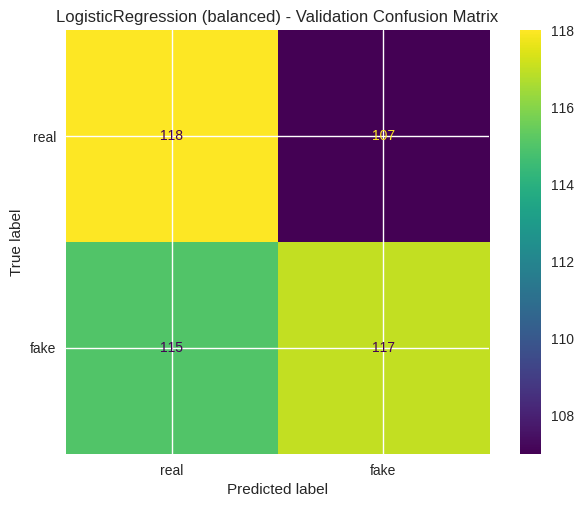

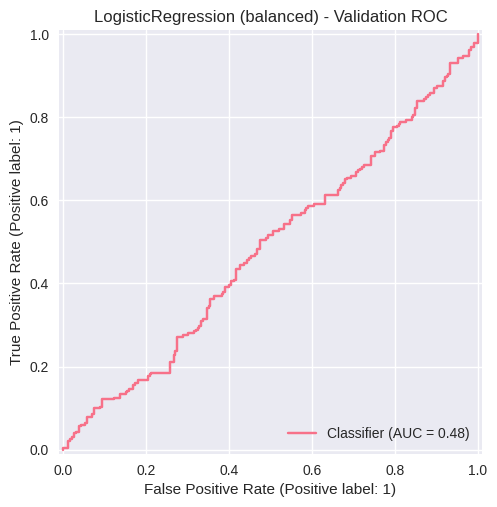

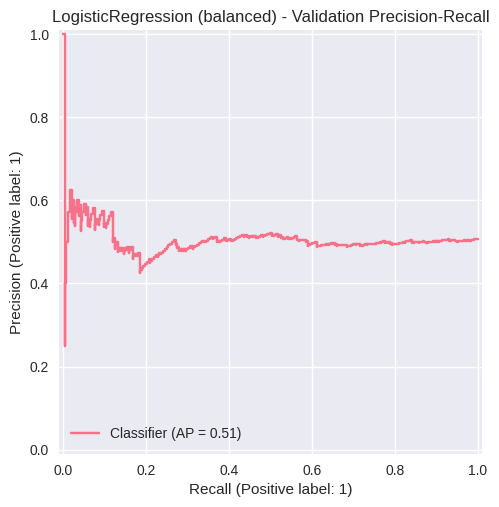


Test Accuracy: 0.4726
Test Precision: 0.4779
Test Recall:    0.4675
Test F1:        0.4726
Test AUC:       0.4656
Fitting 3 folds for each of 8 candidates, totalling 24 fits
RF best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

=== RandomForest (best) ===
Train Acc: 1.0000
Val   Acc: 0.4923
Val Precision: 0.5000
Val Recall:    0.5517
Val F1:        0.5246
Val AUC:       0.4704


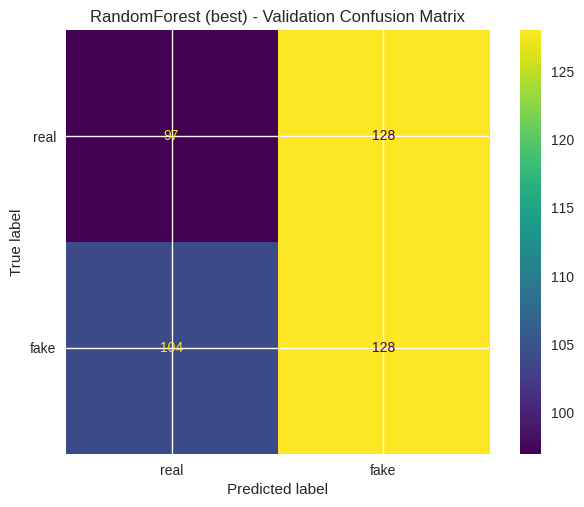

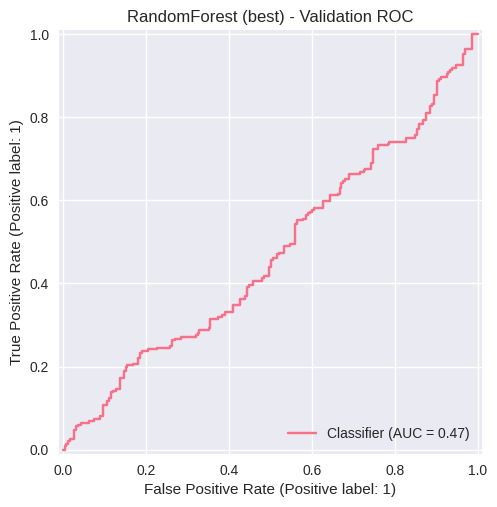

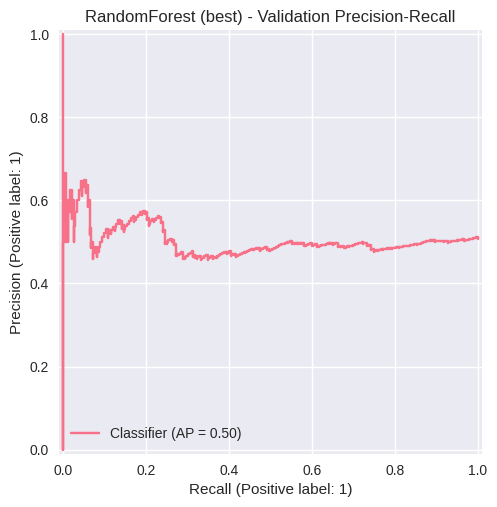


Test Accuracy: 0.4814
Test Precision: 0.4883
Test Recall:    0.5411
Test F1:        0.5133
Test AUC:       0.4678

=== ComplementNB (TF-IDF only) ===
Train Acc: 0.7723
Val   Acc: 0.4989
Val Precision: 0.5061
Val Recall:    0.5388
Val F1:        0.5219
Val AUC:       0.4981


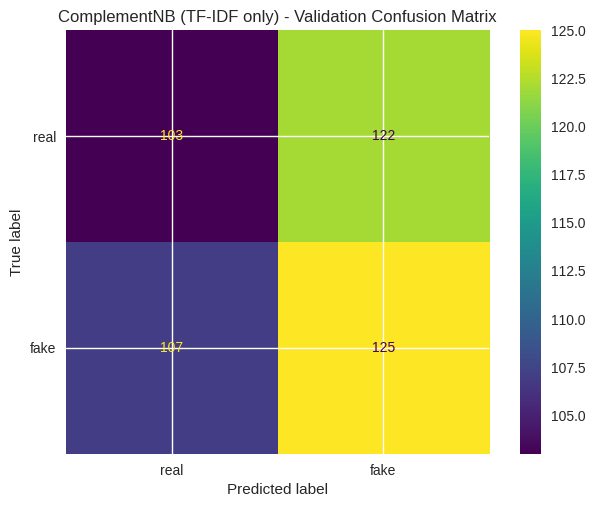

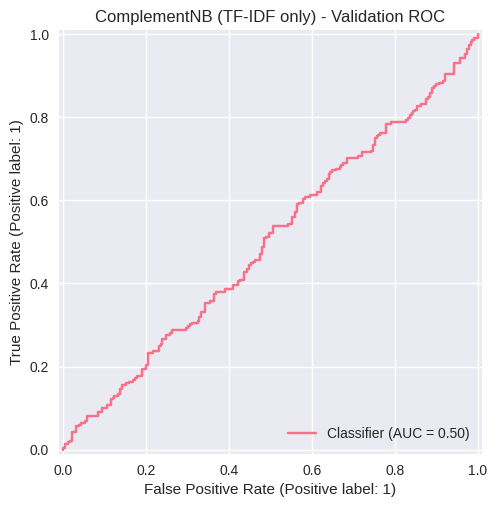

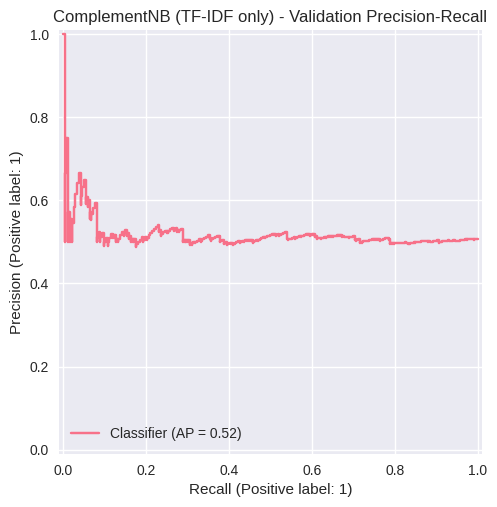


Test Accuracy: 0.4989
Test Precision: 0.5044
Test Recall:    0.4978
Test F1:        0.5011
Test AUC:       0.4820
Top positive features (indicator of fake):
success -> 1.5053
ability -> 1.4280
trade -> 1.4216
blue -> 1.3686
dog -> 1.3294
small -> 1.0901
boy -> 1.0304
best -> 1.0203
social -> 0.9835
reduce -> 0.9657
let -> 0.9193
moment -> 0.9128
rule -> 0.8991
include -> 0.8836
fund -> 0.8781
indicate -> 0.8575
operation -> 0.8496
course -> 0.8441
hard -> 0.8239
computer -> 0.8195

Top negative features (indicator of real):
box -> -1.5949
participant -> -1.2811
reflect -> -1.2036
painting -> -1.1041
address -> -1.0933
religious -> -1.0752
action -> -1.0675
big -> -1.0631
catch -> -1.0470
wind -> -1.0241
loss -> -1.0231
professional -> -1.0084
decision -> -0.9804
response -> -0.9649
community -> -0.9606
cup -> -0.9195
drive -> -0.9156
scene -> -0.9153
theory -> -0.9098
number -> -0.9071
Saved model artifacts to disk: tfidf_vectorizer.joblib, scaler.joblib, label_encoders.joblib, logreg

In [31]:
# ======= Safe fixes & extra features =======
import re
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay)
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression

# --- Robust sentence splitting and safe ratios ---
def count_sentences(text):
    if pd.isna(text) or str(text).strip()=="":
        return 0
    # split on ., !, ? but avoid multiple punctuation producing extra empty tokens
    sentences = [s for s in re.split(r'[.!?]+', str(text)) if s.strip()]
    return max(1, len(sentences))   # return at least 1 to avoid division by zero

df['sentence_count'] = df['text'].apply(count_sentences)
df['avg_sentence_length'] = df.apply(lambda r: (r['text_word_count'] / r['sentence_count']) if r['sentence_count']>0 else r['text_word_count'], axis=1)

# avoid division by zero for title_text_ratio
df['title_text_ratio'] = df.apply(lambda r: (r['title_word_count'] / r['text_word_count']) if r['text_word_count']>0 else 0, axis=1)

# Recompute variables used in modeling if you changed them
numerical_features = [
    'title_word_count', 'text_word_count', 'title_char_count', 'text_char_count',
    'avg_word_length', 'sentence_count', 'avg_sentence_length',
    'capital_ratio', 'title_text_ratio',
    'source_encoded', 'category_encoded', 'author_encoded',
    'day_of_week', 'day_of_year'
]

X_numerical = df[numerical_features].fillna(0)
y = (df['label'] == 'fake').astype(int)

# -------- Train/Val/Test split (if needed, reuse your existing splits) ----------
# (If you've already split earlier, use those arrays -- here is a safety fallback)
from sklearn.model_selection import train_test_split
if 'X_train_final' not in globals():
    X_train_num, X_temp_num, y_train, y_temp = train_test_split(
        X_numerical, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val_num, X_test_num, y_val, y_test = train_test_split(
        X_temp_num, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    # Fit TF-IDF again if needed (skip if you have tfidf already)
    # tfidf = TfidfVectorizer(...)  # you had this earlier

# ------- Scaling (reuse your scaler if fitted) -------
scaler = scaler if 'scaler' in globals() else StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

# ------- TF-IDF (reuse fitted tfidf if exists) ----------
tfidf = tfidf if 'tfidf' in globals() else TfidfVectorizer(max_features=5000, min_df=5, max_df=0.95,
                                                           ngram_range=(1,2), stop_words='english',
                                                           lowercase=True, strip_accents='unicode',
                                                           token_pattern=r'\b[a-zA-Z][a-zA-Z]+\b')
train_text = df.loc[X_train_num.index, 'combined_text']
val_text   = df.loc[X_val_num.index, 'combined_text']
test_text  = df.loc[X_test_num.index, 'combined_text']

X_train_tfidf = tfidf.fit_transform(train_text)
X_val_tfidf   = tfidf.transform(val_text)
X_test_tfidf  = tfidf.transform(test_text)

# ------- Combine for models that accept signed numerical values -------
from scipy.sparse import hstack, csr_matrix
X_train_final = hstack([X_train_tfidf, csr_matrix(X_train_num_scaled)])
X_val_final   = hstack([X_val_tfidf,   csr_matrix(X_val_num_scaled)])
X_test_final  = hstack([X_test_tfidf,  csr_matrix(X_test_num_scaled)])

# ======= Helper: evaluation function =========
def evaluate_model(name, model, X_tr, y_tr, X_v, y_v, X_te=None, y_te=None, pos_label=1):
    y_tr_pred = model.predict(X_tr)
    y_v_pred  = model.predict(X_v)
    y_tr_prob = model.predict_proba(X_tr)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_tr)
    y_v_prob  = model.predict_proba(X_v)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_v)

    print(f"\n=== {name} ===")
    print("Train Acc: {:.4f}".format(accuracy_score(y_tr, y_tr_pred)))
    print("Val   Acc: {:.4f}".format(accuracy_score(y_v, y_v_pred)))
    print("Val Precision: {:.4f}".format(precision_score(y_v, y_v_pred)))
    print("Val Recall:    {:.4f}".format(recall_score(y_v, y_v_pred)))
    print("Val F1:        {:.4f}".format(f1_score(y_v, y_v_pred)))
    try:
        print("Val AUC:       {:.4f}".format(roc_auc_score(y_v, y_v_prob)))
    except:
        pass

    # Confusion matrix on validation
    cm = confusion_matrix(y_v, y_v_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['real','fake'])
    disp.plot()
    plt.title(f"{name} - Validation Confusion Matrix")
    plt.show()

    # ROC curve
    try:
        RocCurveDisplay.from_predictions(y_v, y_v_prob)
        plt.title(f"{name} - Validation ROC")
        plt.show()
    except Exception:
        pass

    # Precision-Recall
    try:
        PrecisionRecallDisplay.from_predictions(y_v, y_v_prob)
        plt.title(f"{name} - Validation Precision-Recall")
        plt.show()
    except Exception:
        pass

    if X_te is not None and y_te is not None:
        y_te_pred = model.predict(X_te)
        y_te_prob = model.predict_proba(X_te)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_te)
        print("\nTest Accuracy: {:.4f}".format(accuracy_score(y_te, y_te_pred)))
        print("Test Precision: {:.4f}".format(precision_score(y_te, y_te_pred)))
        print("Test Recall:    {:.4f}".format(recall_score(y_te, y_te_pred)))
        print("Test F1:        {:.4f}".format(f1_score(y_te, y_te_pred)))
        try:
            print("Test AUC:       {:.4f}".format(roc_auc_score(y_te, y_te_prob)))
        except:
            pass

# ======= Train alternative models / hyper-tune =======

# 1) Logistic Regression (you already trained one — but here's with class_weight balanced)
lr_bal = LogisticRegression(C=1.0, max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
lr_bal.fit(X_train_final, y_train)
evaluate_model("LogisticRegression (balanced)", lr_bal, X_train_final, y_train, X_val_final, y_val, X_test_final, y_test)

# 2) Random Forest with quick GridSearch (small grid; expand later)
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}
gscv = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
# NOTE: RandomForest doesn't accept sparse matrices well; convert to dense or use smaller dataset / partial features.
# We'll fit RF on numerical + top-k TF-IDF features to keep memory small
top_k = 1000
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=min(top_k, X_train_tfidf.shape[1]))
selector.fit(X_train_tfidf, y_train)
X_train_tfidf_k = selector.transform(X_train_tfidf)
X_val_tfidf_k   = selector.transform(X_val_tfidf)
X_test_tfidf_k  = selector.transform(X_test_tfidf)

X_train_rf = np.hstack([X_train_tfidf_k.toarray(), X_train_num_scaled])
X_val_rf   = np.hstack([X_val_tfidf_k.toarray(), X_val_num_scaled])
X_test_rf  = np.hstack([X_test_tfidf_k.toarray(), X_test_num_scaled])

gscv.fit(X_train_rf, y_train)
print("RF best params:", gscv.best_params_)
best_rf = gscv.best_estimator_
evaluate_model("RandomForest (best)", best_rf, X_train_rf, y_train, X_val_rf, y_val, X_test_rf, y_test)

# 3) Naive Bayes approach: train only on TF-IDF (no scaled numeric features)
nb = ComplementNB()   # ComplementNB better with imbalanced TF-IDF
nb.fit(X_train_tfidf, y_train)
evaluate_model("ComplementNB (TF-IDF only)", nb, X_train_tfidf, y_train, X_val_tfidf, y_val, X_test_tfidf, y_test)

# ======= Interpretability: top TF-IDF features from logistic regression =======
def top_tfidf_features_from_coef(model, tfidf, top_n=30):
    if not hasattr(model, "coef_"):
        print("Model has no coef_")
        return
    coefs = model.coef_[0][:len(tfidf.get_feature_names_out())]  # only tfidf part
    feat_names = tfidf.get_feature_names_out()
    top_pos = np.argsort(coefs)[-top_n:][::-1]
    top_neg = np.argsort(coefs)[:top_n]
    print("Top positive features (indicator of fake):")
    for i in top_pos:
        print(f"{feat_names[i]} -> {coefs[i]:.4f}")
    print("\nTop negative features (indicator of real):")
    for i in top_neg[:top_n]:
        print(f"{feat_names[i]} -> {coefs[i]:.4f}")

# if logistic model trained on X_train_final has coef_ aligned with tfidf portion:
# ensure coef mapping — if you trained lr_bal on combined features:
top_tfidf_features_from_coef(lr_bal, tfidf, top_n=20)

# ======= Save artifacts =======
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(label_encoders, 'label_encoders.joblib')
joblib.dump(lr_bal, 'logreg_balanced.joblib')
joblib.dump(best_rf, 'rf_best.joblib')
joblib.dump(nb, 'nb_tfidf.joblib')

print("Saved model artifacts to disk: tfidf_vectorizer.joblib, scaler.joblib, label_encoders.joblib, logreg_balanced.joblib, rf_best.joblib, nb_tfidf.joblib")


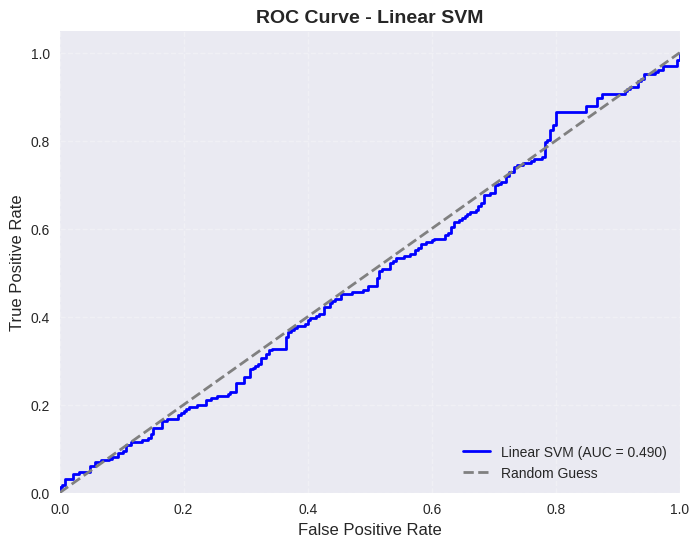

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Linear SVM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')

# Style improvements
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Linear SVM', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3, linestyle='--')

# Axis limits for clarity
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Show plot
plt.show()
